Name: Yilin Pu

Github Username: pyl32

USC ID: 2952467624

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Combined Cycle Power Plant Data Set 

### (a) Download the Combined Cycle Power Plant data1
from:
https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

### (b) Exploring the data:

#### i. How many rows are in this data set? How many columns? What do the rows and columns represent?


In [5]:
data = pd.read_excel("../data/Folds5x2_pp.xlsx")
df = pd.DataFrame(data)
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


There are 9568 rows and 5 columns in this data set. Each row represent a data point collected from a Combined Cycle Power Plant over 6 years (2006-2011). For the columns, there are four features consist of hourly average ambient variables Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH), Exhaust Vacuum (V) and the column of PE is the net hourly electrical energy output of the plant that is the response we need to predict based on feature.

#### ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

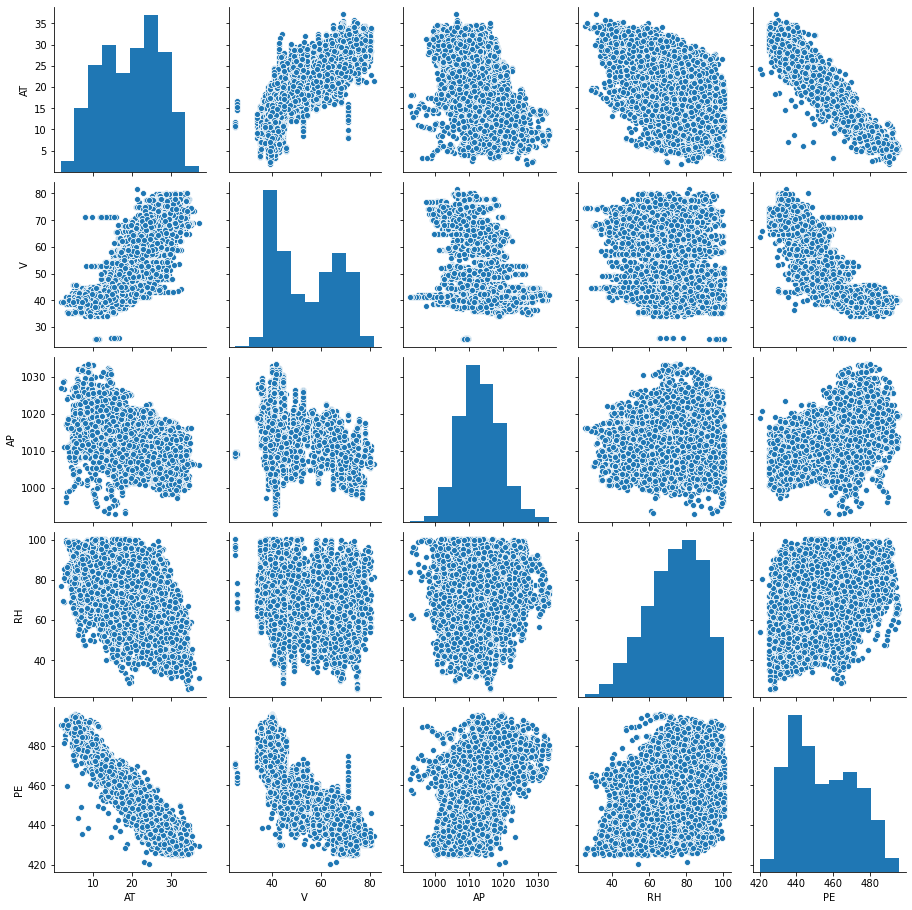

In [6]:
pair_plot = sns.pairplot(df)

Look at the pair plots, we can find there are some linear correlation exist. For example, V vs AT seems positive correlated and PE vs AT seems negative correlated.

#### iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [7]:
df_stats = df.describe()
trans=df_stats.T

range1=trans["max"]-trans["min"]
q1=df.quantile(0.25)
q3=df.quantile(0.75)
intq=q3-q1

df_temp=pd.DataFrame([range1,q1,q3,intq],index=["range","1st Quart","3rd Quart","IQR"])
df_stats=df_stats.append(df_temp)

sum_table=df_stats.T[["mean","50%","range","1st Quart","3rd Quart","IQR"]]
sum_table

,mean,50%,range,1st Quart,3rd Quart,IQR
AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
V,54.305804,52.080,56.20,41.7400,66.54,24.8000
AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


### (c) For each predictor, fit a simple linear regression model to predict the response.
Describe your results. In which of the models is there a statistically significant
association between the predictor and the response? Create some plots to back
up your assertions. Are there any outliers that you would like to remove from
your data for each of these regression tasks?

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Thu, 10 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:28:15   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      0.0

<ipython-input-8-16b270eeae62>:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax.stem(c, markerfmt = ",")


According to the Cook Distance plot below, the number of outliers :  633


Text(0.5, 0, 'PE~AT')

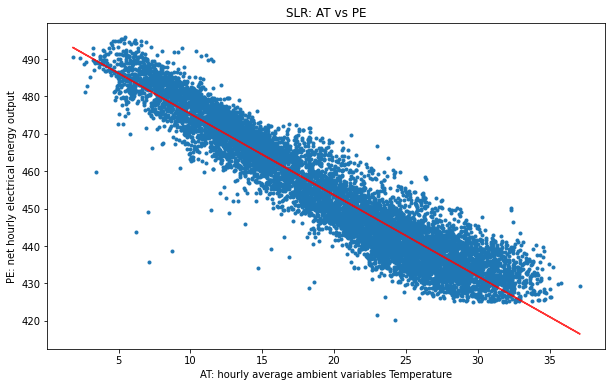

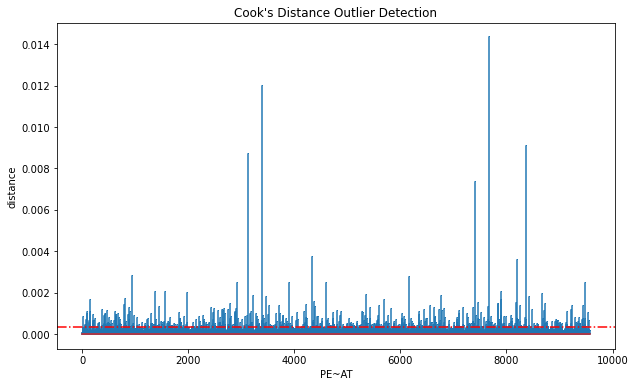

In [8]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm

# AT vs PE
##SLR
model1 = smf.ols(formula="PE~AT",data=df)
fit1 = model1.fit()
print(fit1.summary())

##plot
fig = plt.figure(figsize=(10,6))
axes1 = fig.add_subplot(1,1,1)
axes1.plot(df.iloc[:,0],df.iloc[:,4],'.')
axes1.plot(df.iloc[:,0], fit1.predict(df.iloc[:,0]), color='r', alpha=0.8, label="Regression Line")
axes1.set_xlabel("AT: hourly average ambient variables Temperature")
axes1.set_ylabel("PE: net hourly electrical energy output")
axes1.set_title("SLR: AT vs PE")
axes1.legend

##outliers

### Here, I consider the data points that c value 3 times greater than the average c as the outliers.

inf1 = fit1.get_influence()
c1, p1 = inf1.cooks_distance
  
def plot_cooks_distance(c):
    m = np.mean(c)
    _, ax = plt.subplots(figsize = (10,6))
    ax.stem(c, markerfmt = ",")
    plt.axhline(y=3*m, color='r', linestyle='-.')
    ax.set_ylabel("distance")
    ax.set_title("Cook's Distance Outlier Detection")
    
    count= 0 
    for i in range(len(c)):
        if c[i] > 3*m:
            count = count+1
    print("According to the Cook Distance plot below, the number of outliers : ", count)
    
    return ax

plot_cooks_distance(c1).set_xlabel("PE~AT")


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Thu, 10 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:28:32   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.8015      0.378   1370.218      0.0

<ipython-input-8-16b270eeae62>:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax.stem(c, markerfmt = ",")


According to the Cook Distance plot below, the number of outliers :  809


Text(0.5, 0, 'PE~V')

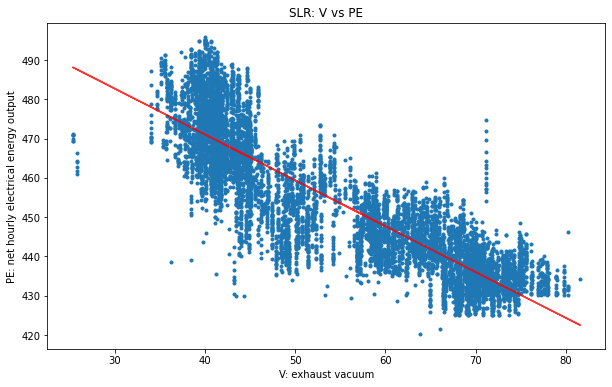

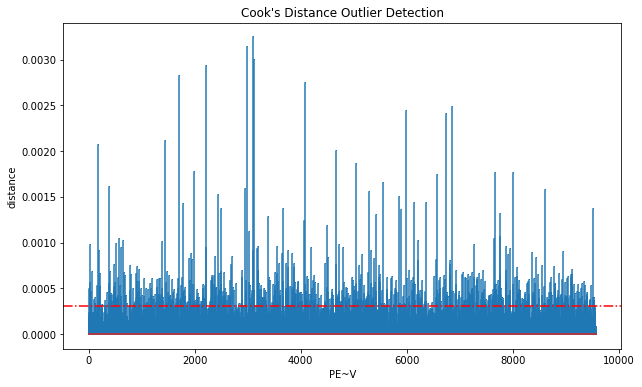

In [9]:
# V vs PE
##SLR
model2 = smf.ols(formula="PE~V",data=df)
fit2 = model2.fit()
print(fit2.summary())

##plot
fig = plt.figure(figsize=(10,6))
axes2 = fig.add_subplot(1,1,1)
axes2.plot(df.iloc[:,1],df.iloc[:,4],'.',label="data points")
axes2.plot(df.iloc[:,1], fit2.predict(df.iloc[:,1]), color='r', alpha=0.8, label="Regression Line")
axes2.set_xlabel("V: exhaust vacuum")
axes2.set_ylabel("PE: net hourly electrical energy output")
axes2.set_title("SLR: V vs PE")

##outliers

inf2 = fit2.get_influence()
c2, p2 = inf2.cooks_distance

plot_cooks_distance(c2).set_xlabel("PE~V")

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Thu, 10 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:28:52   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1055.2610     25.459    -41.449      0.0

<ipython-input-8-16b270eeae62>:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax.stem(c, markerfmt = ",")


According to the Cook Distance plot below, the number of outliers :  493


Text(0.5, 0, 'PE~AP')

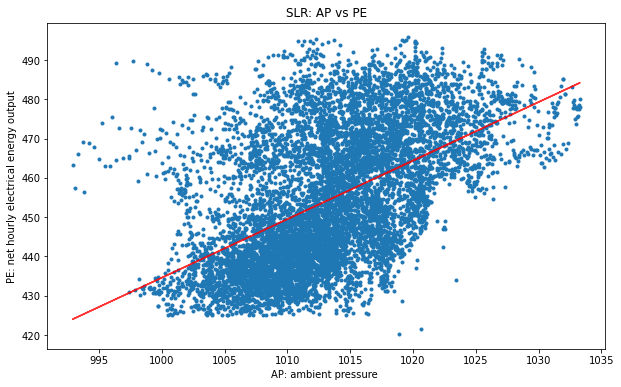

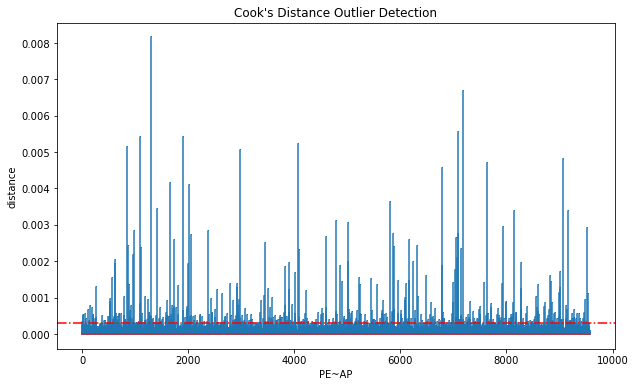

In [10]:
# AP vs PE
##SLR
model3 = smf.ols(formula="PE~AP",data=df)
fit3 = model3.fit()
print(fit3.summary())

##plot
fig = plt.figure(figsize=(10,6))
axes3 = fig.add_subplot(1,1,1)
axes3.plot(df.iloc[:,2],df.iloc[:,4],'.',label="data points")
axes3.plot(df.iloc[:,2], fit3.predict(df.iloc[:,2]), color='r', alpha=0.8, label="Regression Line")
axes3.set_xlabel("AP: ambient pressure ")
axes3.set_ylabel("PE: net hourly electrical energy output")
axes3.set_title("SLR: AP vs PE")

##outliers

inf3 = fit3.get_influence()
c3, p3 = inf3.cooks_distance

plot_cooks_distance(c3).set_xlabel("PE~AP")

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Thu, 10 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:29:06   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    420.9618      0.823    511.676      0.0

<ipython-input-8-16b270eeae62>:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax.stem(c, markerfmt = ",")


According to the Cook Distance plot below, the number of outliers :  623


Text(0.5, 0, 'PE~RH')

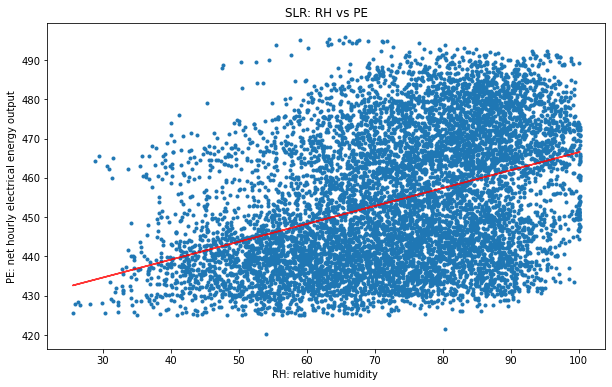

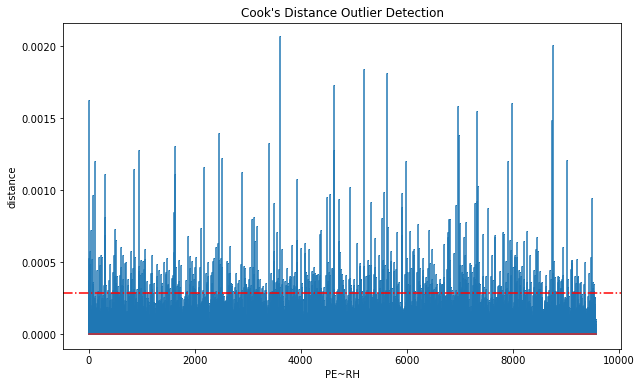

In [11]:
# RH vs PE
##SLR
model4 = smf.ols(formula="PE~RH",data=df)
fit4 = model4.fit()
print(fit4.summary())

##plot
fig = plt.figure(figsize=(10,6))
axes4 = fig.add_subplot(1,1,1)
axes4.plot(df.iloc[:,3],df.iloc[:,4],'.',label="data points")
axes4.plot(df.iloc[:,3], fit4.predict(df.iloc[:,3]), color='r', alpha=0.8, label="Regression Line")
axes4.set_xlabel("RH: relative humidity ")
axes4.set_ylabel("PE: net hourly electrical energy output")
axes4.set_title("SLR: RH vs PE")

##outliers

inf4 = fit4.get_influence()
c4, p4 = inf4.cooks_distance

plot_cooks_distance(c4).set_xlabel("PE~RH")

### (d) Fit a multiple regression model to predict the response using all of the predictors.
Describe your results. For which predictors can we reject the null hypothesis
H0 : βj = 0?

In [12]:
model_full = smf.ols(formula="PE~AT+V+AP+RH",data=df)
fit_full = model_full.fit()
print(fit_full.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Thu, 10 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:29:26   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.0

Since p=0 for all predictors, we reject all the null hypothesis(beta=0).

### (e) How do your results from 1c compare to your results from 1d? Create a plot
displaying the univariate regression coefficients from 1c on the x-axis, and the
multiple regression coefficients from 1d on the y-axis. That is, each predictor is
displayed as a single point in the plot. Its coefficient in a simple linear regression
model is shown on the x-axis, and its coefficient estimate in the multiple linear
regression model is shown on the y-axis.

Text(0.5, 1.0, 'Comparison plot: linear vs multiple')

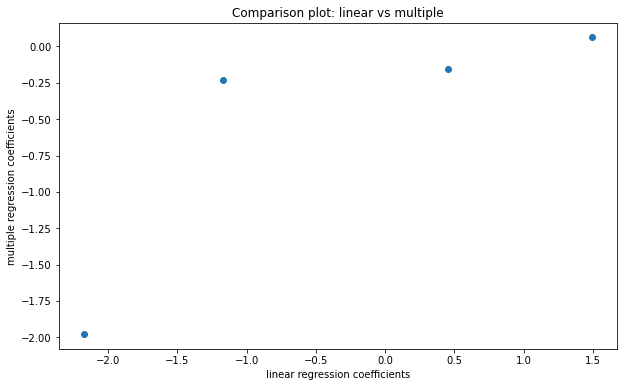

In [13]:
linear = [-2.1713,-1.1681,1.4899,0.4557]
multiple = [-1.9775,-0.2339,0.0621,-0.1581]
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(linear,multiple)
ax.set_xlabel("linear regression coeﬃcients")
ax.set_ylabel("multiple regression coeﬃcients")
ax.set_title("Comparison plot: linear vs multiple")


### (f) Is there evidence of nonlinear association between any of the predictors and the response? 
To answer this question, for each predictor X, ﬁt a model of the form $ Y_i = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 +\epsilon $

In [14]:
AT = df.iloc[:,0]
x1 = pd.DataFrame({'X':AT,'XX':AT**2,'XXX':AT**3})
x1 = sm.add_constant(x1)
y = df.iloc[:,4]
m1 = sm.OLS(y,x1)
f1= m1.fit()
print(f1.summary())

V = df.iloc[:,1]
x2 = pd.DataFrame({'X':V,'XX':V**2,'XXX':V**3})
x2 = sm.add_constant(x2)
y = df.iloc[:,4]
m2 = sm.OLS(y,x2)
f2= m2.fit()
print(f2.summary())

AP = df.iloc[:,2]
x3 = pd.DataFrame({'X':AP,'XX':AP**2,'XXX':AP**3})
x3 = sm.add_constant(x3)
y = df.iloc[:,4]
m3 = sm.OLS(y,x3)
f3= m3.fit()
print(f3.summary())

RH = df.iloc[:,3]
x4 = pd.DataFrame({'X':RH,'XX':RH**2,'XXX':RH**3})
x4 = sm.add_constant(x4)
y = df.iloc[:,4]
m4 = sm.OLS(y,x4)
f4= m4.fit()
print(f4.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Thu, 10 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:29:26   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

For AT, we reject null hypothesis beacause p=0 and the linear association exist bewtween predictor and respose.

For V, p=0 for $X$ and p=0.014<0.05 for $X^3$, we reject the null hypothesis and the linear association exist bewtween predictor and respose. And we fail to reject for $X^2$ since p=0.768 > 0.05 which means there no association. 

For AP, we reject null hypothesis beacause p=0 and the linear association exist bewtween predictor and respose.

For RH, we reject null hypothesis beacause p=0 and the linear association exist bewtween predictor and respose.

###  (g) Is there evidence of association of interactions of predictors with the response?
To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [15]:
pair = 'PE ~ AT + V + AP + RH + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH'
m_pair = smf.ols(formula = pair, data = df)
fit_pair = m_pair.fit()
print(fit_pair.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Thu, 10 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:29:27   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

From the result above, we can see that $V,AP,RH,AT:V,AT:RH,V:AP,AP:RH$ are statistically significant since p < 0.05 and the $AT,AT:AP,V:RH$ are not. Therefore, the association interaction terms are $AT:V, AT:RH, V:AP, AP:RH$.

### (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? 
Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test
MSEs.

In [16]:
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import mean_squared_error as MSE

X = df.iloc[:,:4]
Y = df.iloc[:,4]
x_train,x_test,y_train,y_test = split(X, Y, test_size = 0.3)


x_train = sm.add_constant(x_train)
model_train = sm.OLS(y_train, x_train)
fit_train = model_train.fit()
predict_train = fit_train.predict(x_train)
mse_train = MSE(y_train, predict_train)
print("The Mean Square Error for train set: ", mse_train)


x_test = sm.add_constant(x_test)
predict_test = fit_train.predict(x_test)
mse_test = MSE(y_test, predict_test)
print("The Mean Square Error for test set: ", mse_test)

The Mean Square Error for train set:  20.785305708048845
The Mean Square Error for test set:  20.733799792624552


In [17]:
interaction = 'PE ~ AT + V + AP + RH + I(AT**2) + I(V**2) + I(AP**2) + I(RH**2) + AT:V + AT:AP + AT:RH + V:AP + V:RH + AP:RH'
int_data = pd.concat([x_train, pd.DataFrame(y_train)],axis = 1)

model_train = smf.ols(formula = interaction, data = int_data)
fit_train = model_train.fit()

predict_train = fit_train.predict(sm.add_constant(x_train))
predict_test = fit_train.predict(sm.add_constant(x_test))
mse_train = MSE(y_train, predict_train)
mse_test = MSE(y_test, predict_test)
print("The MSE train set: ", mse_train)
print("The MSE test set: ", mse_test)
print(fit_train.pvalues)


The MSE train set:  18.08078795119048
The MSE test set:  18.17473886262117
Intercept     7.158341e-08
AT            1.089983e-01
V             9.465286e-02
AP            8.250293e-09
RH            6.743949e-05
I(AT ** 2)    1.389088e-06
I(V ** 2)     1.755220e-01
I(AP ** 2)    7.460262e-09
I(RH ** 2)    1.235734e-08
AT:V          2.284431e-04
AT:AP         3.648110e-01
AT:RH         3.361329e-04
V:AP          1.527556e-01
V:RH          2.778875e-01
AP:RH         1.174214e-04
dtype: float64


In [18]:
interaction2 = 'PE ~ AT + V + AP + RH + I(AT**2)+ + I(AP**2) + I(RH**2) + AT:V + AT:RH + V:AP + V:RH + AP:RH'
int_data = pd.concat([x_train, pd.DataFrame(y_train)],axis = 1)

model_train = smf.ols(formula = interaction2, data = int_data)
fit_train = model_train.fit()

predict_train = fit_train.predict(sm.add_constant(x_train))
predict_test = fit_train.predict(sm.add_constant(x_test))
mse_train = MSE(y_train, predict_train)
mse_test = MSE(y_test, predict_test)
print("The MSE train set: ", mse_train)
print("The MSE test set: ", mse_test)
print(fit_train.pvalues)

The MSE train set:  18.089489296564615
The MSE test set:  18.18124114199427
Intercept     2.790240e-12
AT            3.838545e-66
V             2.139162e-04
AP            1.506490e-13
RH            7.368760e-09
I(AT ** 2)    5.377097e-13
I(AP ** 2)    1.803993e-13
I(RH ** 2)    6.926927e-09
AT:V          4.232807e-07
AT:RH         9.076578e-05
V:AP          1.010181e-03
V:RH          4.321321e-01
AP:RH         1.770184e-08
dtype: float64


### (i) KNN Regression:
i. Perform k-nearest neighbor regression for this dataset using both normalized
and raw features. Find the value of k ∈ {1, 2, . . . , 100} that gives you the
best fit. Plot the train and test errors in terms of 1/k.

0.0 1
16.942432634535006 4
For Train data, k = 1  and MSE:  10.075978834104825
For Test data, k = 4  and MSE:  17.028844206199928


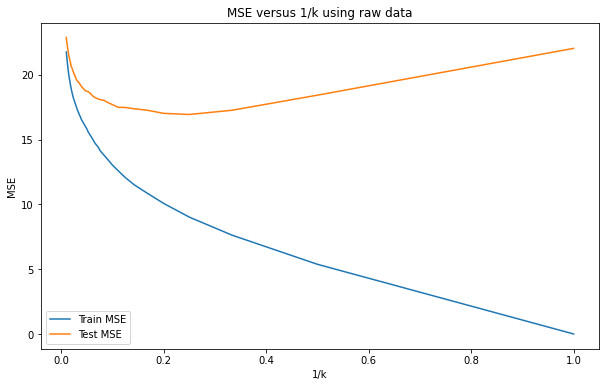

In [43]:
from sklearn import preprocessing
from sklearn import neighbors

train_error = 100
k_train = 1
test_error = 100
k_test = 1
final_error_train = []
final_error_test = []
N = []


for k in range(1,101):
    N.append(1/k)
    modelk = neighbors.KNeighborsRegressor(n_neighbors=k)
    modelk.fit(x_train,y_train)
    mse_train_ = MSE(y_train,modelk.predict(x_train))
    mse_test_ = MSE(y_test,modelk.predict(x_test))
    if mse_train_ < train_error:
        train_error = mse_train_
        k_train = k
    if mse_test_ < test_error:
        test_error = mse_test_
        k_test = k
    final_error_train.append(mse_train_)
    final_error_test.append(mse_test_)
    k +=1
    
print(train_error,k_train)
print(test_error,k_test)


print('For Train data,', "k =",k_train, " and MSE: ", final_mse_train[4])
print('For Test data,', "k =",k_test, " and MSE: ", final_mse_test[4])

fig, axes = plt.subplots(figsize=(10, 6))
axes.plot(N, final_error_train, label="Train MSE")
axes.plot(N, final_error_test, label="Test MSE")
axes.set_xlabel("1/k")
axes.set_ylabel("MSE")
axes.legend()
axes.set_title("MSE versus 1/k using raw data")
plt.show()

0.0 1
15.424849757150044 6
For Train data, k = 1  and MSE:  10.075978834104825
For Test data, k = 6  and MSE:  17.028844206199928


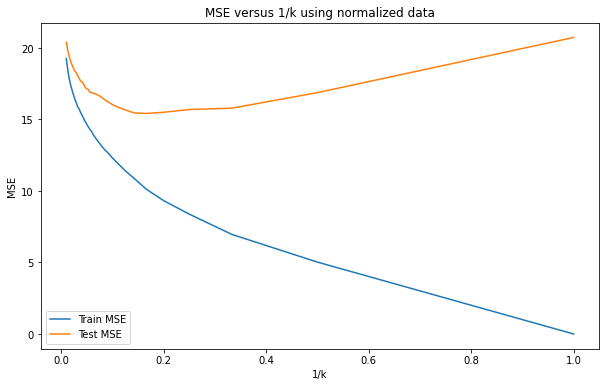

In [45]:
x_train_norm = preprocessing.scale(x_train)
x_test_norm = preprocessing.scale(x_test)

train_error = 100
k_train = 1
test_error = 100
k_test = 1
final_error_train = []
final_error_test = []
N = []

for k in range(1,101):
    N.append(1/k)
    modelk = neighbors.KNeighborsRegressor(n_neighbors=k)
    modelk.fit(x_train_norm,y_train)
    mse_train_ = MSE(y_train,modelk.predict(x_train_norm))
    mse_test_ = MSE(y_test,modelk.predict(x_test_norm))
    if mse_train_ < train_error:
        train_error = mse_train_
        k_train = k
    if mse_test_ < test_error:
        test_error = mse_test_
        k_test = k
    final_error_train.append(mse_train_)
    final_error_test.append(mse_test_)
    k +=1
    
print(train_error,k_train)
print(test_error,k_test)


print('For Train data,', "k =",k_train, " and MSE: ", final_mse_train[4])
print('For Test data,', "k =",k_test, " and MSE: ", final_mse_test[4])

fig, axes = plt.subplots(figsize=(10, 6))
axes.plot(N, final_error_train, label="Train MSE")
axes.plot(N, final_error_test, label="Test MSE")
axes.set_xlabel("1/k")
axes.set_ylabel("MSE")
axes.legend()
axes.set_title("MSE versus 1/k using normalized data")
plt.show()

### (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis

Compare the results of KNN Regression with the linear regression model above, seems like the KNN Regressiom have a better performance than linear model in this dataset since KNN regression has the smallest test error.


## 2. ISLR: 2.4.1

###  For each of parts (a) through (d), indicate whether we would generally expect the performance of a ﬂexible statistical learning method to be better or worse than an inﬂexible method. Justify your answer

### (a) The sample size n is extremely large, and the number of predictors p is small.

When sample size is large, a ﬂexible statistical learning method to be better than an inﬂexible method because it fit the data closer with the large sample size and smaller p prevent the overfitting of the model.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

When p is large and n is small, a flexible statistical learning method to be worse than an inﬂexible method because it would overfit the small number of observations.

### (c) The relationship between the predictors and response is highly non-linear.

When the predictors and response is hghly non-linear, a ﬂexible statistical learning method to be better than an inﬂexible method, because the inflexible method would hard to perform the non-linear relationship. Therefore, a flexible method fit better.

### (d) The variance of the error terms, i.e. σ 2 = Var(ϵ), is extremely high.

When var(ϵ) is extremely high, a flexible statistical learning method to be worse than an inﬂexible method because
it would overfit to the noise in the error terms. Therefore, inflexible method fit better.

## 3. ISLR: 2.4.7.

### The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.

Suppose we wish to use this data set to make a prediction for Y when X 1 = X 2 = X 3 = 0 using K-nearest neighbors.

### (a) Compute the Euclidean distance between each observation and the test point, X 1 = X 2 = X 3 = 0.

In [85]:
table = [[0,3,0,'Red'], [2,0,0,'Red'], [0,1,3,'Red'], [0,1,2,'Green'], [-1,0,1,'Green'], [1,1,1,'Red']]

dist = []
n = -1

for i in table:
    num=range(0,6)
    dist.append((i[0]**2+i[1]**2+i[2]**2)**0.5)
    n=n+1
    print("The Euclidean distance :", dist[n])

The Euclidean distance : 3.0
The Euclidean distance : 2.0
The Euclidean distance : 3.1622776601683795
The Euclidean distance : 2.23606797749979
The Euclidean distance : 1.4142135623730951
The Euclidean distance : 1.7320508075688772


### (b) What is our prediction with K = 1? Why?

The prediction when K=1 means the nearest distance to the test point which is obs5. So the prediction is Green.

### (c) What is our prediction with K = 3? Why?

Because when K=3, the nearest three points are obs2, obs5, obs6. And obs2 and obs6 are Red, obs5 is Green. Therefore, the prediction with K=3 is Red.

### (d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?

When K becomes larger, the boundary becomes linear. If boundary is non-linear, small K fits the model better. Therefore, the best value for K must be small.

## Reference
https://www.statsmodels.org/dev/api.html#statsmodels-formula-api

https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.OLSInfluence.html#statsmodels.stats.outliers_influence.OLSInfluence

https://notebook.community/DistrictDataLabs/yellowbrick/examples/bbengfort/cooks_distance